In [ ]:
#Dataframe and graph plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#SK learn and metrics
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import model_selection
from patsy import dmatrices
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#pip install --upgrade scikit-learn

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving webdata_qtySold.csv to webdata_qtySold.csv


In [ ]:
data = pd.read_csv('webdata_qtySold.csv')

## Investigate if there is any relationship between Quantity Sold and Page Views

Text(0.5, 1.0, 'Page Views Vs Quantity Sold')

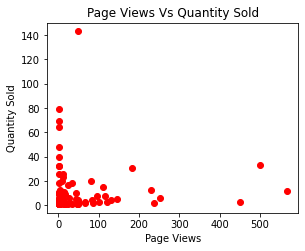

In [ ]:
#Page Views vs Quantity sold
plt.figure(figsize=(4.5, 3.5))
plt.plot(data['Page_Views'], data['Qty_Sold'], 'ro')
plt.xlabel('Page Views')
plt.ylabel('Quantity Sold')
plt.title('Page Views Vs Quantity Sold')
#plt.savefig('Page Views Vs Quantity Sold.png', bbox_inches='tight')

## Poisson Modelling

In [ ]:
np.random.seed(0) # set random seed for reproducibility
mask = np.random.rand(len(data)) < 0.8
df_train = data[mask]
df_test = data[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=76
Testing data set length=14


In [ ]:
df_train

,Unnamed: 0,index,Item Code,Qty_Sold,Page,bom_type ID,BOM Type,Page_Views,Organic_Searches,New_Users,Number_of_Sessions_per_User,Users,Weighted_Avg_Time_on_Page
0,0,0,1013S-MTR,8.0,/systems/AS-1013S-MTR,2.0,BB,96,15,17,27.500000,80,175.812500
1,1,2,1014S-WTRT,31.0,/systems/AS-1014S-WTRT,2.0,BB,184,40,51,65.666667,142,141.908514
2,2,3,1019C-HTN2,13.0,/systems/superServer-1019C-HTN2,2.0,BB,5,2,4,4.000000,5,10.800000
3,3,5,1019P-FHN2T,3.0,/systems/SuperServer-1019P-FHN2T,2.0,BB,101,13,20,28.500000,87,78.643564
4,4,6,1019P-WTR,26.0,/systems/superServer-1019P-WTR,2.0,BB,1,1,1,1.000000,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,123,E50-9AP,20.0,/systems/SuperServer-E50-9AP,2.0,BB,9,1,1,1.000000,5,24.333333
85,85,124,MBI-6118G-T41X,1.0,/systems/MBI-6118G-T41X,5.0,Node,1,0,0,0.000000,1,30.000000
86,86,125,R1208WFTYS,9.0,/systems/intel-R1208WFTYS,2.0,BB,5,2,5,3.000000,5,0.000000
87,87,127,R2224WFTZSR,10.0,/systems/Intel-R2224WFTZSR,2.0,BB,13,1,1,1.000000,10,80.461538


In [ ]:
expr = """Qty_Sold ~ Page_Views"""

In [ ]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [ ]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [ ]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Qty_Sold   No. Observations:                   76
Model:                            GLM   Df Residuals:                       74
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -879.19
Date:                Sat, 23 Oct 2021   Deviance:                       1486.2
Time:                        01:57:07   Pearson chi2:                 2.73e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4807      0.037     66.970      0.0

Predicted values being close to their true values results in a small deviance. Using significance level of 0.05 and DF of 74, the Pearson Chi^2 = 95.1 according to the Chi-Squared table. This value is much smaller than what we have in the summary table above (2730). A high deviance and Pearson Chi2 results in a model that is not robust. 

In [ ]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()

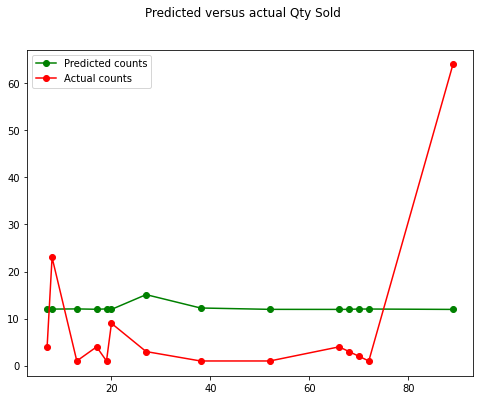

In [ ]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Qty_Sold']
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Predicted versus actual Qty Sold')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()
#fig.savefig('Predicted versus actual Qty Sold.png', bbox_inches='tight')

The predictions don't seem to be in line with its actual value

<Figure size 432x288 with 0 Axes>

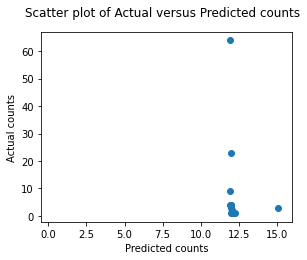

In [ ]:
plt.clf()
fig = plt.figure(figsize=(4.5, 3.5))
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts)
plt.xlim(-0.5, 16)
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()
#fig.savefig('Scatter plot of Actual versus Predicted counts.png', bbox_inches='tight')

A good fit means we should see a straight linear line. However, in this plot it is quite randomly scattered

##Linear Regression

In [ ]:
X = data[['Page_Views']]
Y = data[['Qty_Sold']]

In [ ]:
trainX, testX, trainY, testY = train_test_split(np.array(X), np.array(Y), test_size=0.2)

In [ ]:
linReg = linear_model.LinearRegression()

In [ ]:
linReg.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predYRm = linReg.predict(testX)

In [ ]:
print('Mean squared error', mean_squared_error(testY, predYRm))
print('Mean absolute error', mean_absolute_error(testY, predYRm))
print('Coefficient of determination: %.2f' % r2_score(testX, predYRm))

Mean squared error 108.13793314730299
Mean absolute error 9.755836357363933
Coefficient of determination: -0.06


High MSE and MAE, negative R-Square value. Not a good model for prediction.


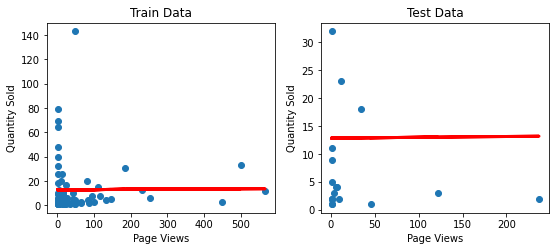

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(9, 3.5))
plt.subplot(1,2,1)
plt.scatter(trainX, trainY)
plt.plot(trainX,linReg.predict(trainX),color='red',linewidth=3.0)
plt.xlabel("Page Views")
plt.ylabel("Quantity Sold")
plt.title('Train Data')

plt.subplot(1,2,2)
plt.scatter(testX, testY)
plt.plot(testX,linReg.predict(testX),color='red',linewidth=3.0)
plt.xlabel("Page Views")
plt.ylabel("Quantity Sold")
plt.title('Test Data')
plt.show()
#plt.savefig('Linear Regression Aggregated Data.png', bbox_inches='tight')

In [ ]:
number_splits = 5
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True)

In [ ]:
for trainIndex, validIndex in kFold.split(X):
  trainX = np.array(X.loc[trainIndex])
  trainY = np.array(Y.loc[trainIndex])
  validX = np.array(X.loc[validIndex])
  validY = np.array(Y.loc[validIndex])
  
  fit = linReg.fit(trainX, trainY)
  pred = linReg.predict(validX)
  print('Mean squared error', mean_squared_error(validY, pred))
  print('Mean absolute error', mean_absolute_error(validY, pred))
  print('Coefficient of determination: %.2f' % r2_score(validY, pred))
  print()

Mean squared error 384.31879472389323
Mean absolute error 13.520465147013962
Coefficient of determination: -0.02

Mean squared error 352.3273100324143
Mean absolute error 12.930498239713456
Coefficient of determination: -0.06

Mean squared error 89.74381840798749
Mean absolute error 8.67017122933982
Coefficient of determination: -0.66

Mean squared error 1035.1111566004738
Mean absolute error 13.99610130347336
Coefficient of determination: -0.04

Mean squared error 258.3139192540864
Mean absolute error 11.758166957340816
Coefficient of determination: -0.01



## Investigate if there is any relationship between quantity sold and other metrics


Text(0.5, 1.0, 'Organic Searches Vs Quantity Sold')

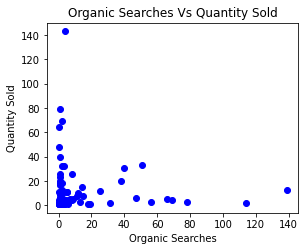

In [ ]:
#Organic Searches vs Quantity sold
plt.figure(figsize=(4.5, 3.5))
plt.plot(data['Organic_Searches'], data['Qty_Sold'], 'bo')
plt.xlabel('Organic Searches')
plt.ylabel('Quantity Sold')
plt.title('Organic Searches Vs Quantity Sold')
#plt.savefig('Organic Searches Vs Quantity Sold.png', bbox_inches='tight')

Text(0.5, 1.0, 'New Users Vs Quantity Sold')

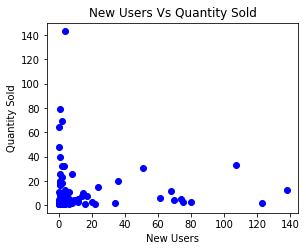

In [ ]:
#New Users vs Quantity sold
plt.figure(figsize=(4.5, 3.5))
plt.plot(data['New_Users'], data['Qty_Sold'], 'bo')
plt.xlabel('New Users')
plt.ylabel('Quantity Sold')
plt.title('New Users Vs Quantity Sold')
#plt.savefig('New Users Vs Quantity Sold.png', bbox_inches='tight')

Text(0.5, 1.0, 'Number of Sessions per User Vs Quantity Sold')

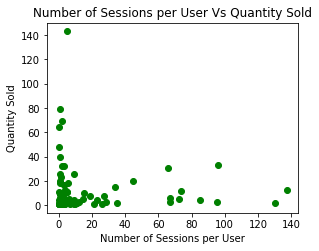

In [ ]:
#Number of Sessions per User vs Quantity sold
plt.figure(figsize=(4.5, 3.5))
plt.plot(data['Number_of_Sessions_per_User'], data['Qty_Sold'], 'go')
plt.xlabel('Number of Sessions per User')
plt.ylabel('Quantity Sold')
plt.title('Number of Sessions per User Vs Quantity Sold')
#plt.savefig('Number of Sessions per User Vs Quantity Sold.png', bbox_inches='tight')

Text(0.5, 1.0, 'Users Vs Quantity Sold')

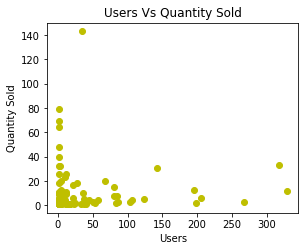

In [ ]:
#Users vs Qty Sold
plt.figure(figsize=(4.5, 3.5))
plt.plot(data['Users'], data['Qty_Sold'], 'yo')
plt.xlabel('Users')
plt.ylabel('Quantity Sold')
plt.title('Users Vs Quantity Sold')
#plt.savefig('Users Vs Quantity Sold.png', bbox_inches='tight')

Text(0.5, 1.0, 'Avg. Time on Page Vs Quantity Sold')

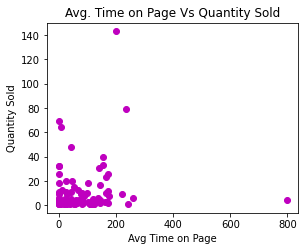

In [ ]:
#Weighted Avg Time on Page vs Quantity Sold
plt.figure(figsize=(4.5, 3.5))
plt.plot(data['Weighted_Avg_Time_on_Page'], data['Qty_Sold'], 'mo')
plt.xlabel('Avg Time on Page')
plt.ylabel('Quantity Sold')
plt.title('Avg. Time on Page Vs Quantity Sold')
#plt.savefig('Avg. Time on Page Vs Quantity Sold.png', bbox_inches='tight')

## Include the other metrics into a Poisson model

In [ ]:
expr = """Qty_Sold ~ Page_Views + Organic_Searches + New_Users + Number_of_Sessions_per_User + Users + Weighted_Avg_Time_on_Page"""

In [ ]:
np.random.seed(0) # set random seed for reproducibility
mask = np.random.rand(len(data)) < 0.8
df_train = data[mask]
df_test = data[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=76
Testing data set length=14


In [ ]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [ ]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [ ]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Qty_Sold   No. Observations:                   76
Model:                            GLM   Df Residuals:                       69
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -751.89
Date:                Sat, 23 Oct 2021   Deviance:                       1231.6
Time:                        01:57:09   Pearson chi2:                 1.80e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()

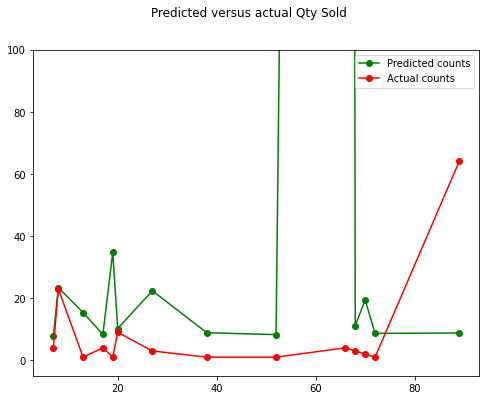

In [ ]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Qty_Sold']
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Predicted versus actual Qty Sold')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.ylim(-5,100)
plt.show()
#fig.savefig('Predicted versus actual Qty Sold.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

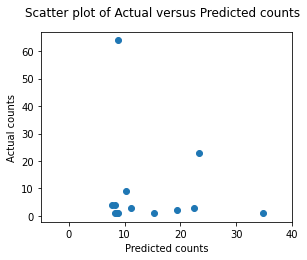

In [ ]:
plt.clf()
fig = plt.figure(figsize=(4.5, 3.5))
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts)
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.xlim(-5,40)
plt.show()
#fig.savefig('Scatter plot of Actual versus Predicted counts.png', bbox_inches='tight')